In [1]:
import os
import subprocess
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load frequency-model and halfspace-code
from empymod.model import frequency
from empymod.kernel import halfspace
from empymod import filters

# Plotting style adjustments
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.style'] = 'normal'

# Set axis and limits
def limits(i):
    plt.sca(axs[i])
    plt.xlim(min(x)/1000, max(x)/1000)
    plt.ylim(min(x)/1000, max(x)/1000)
    plt.axis('equal')    

## Model parameters, as in halfspacemod.src from Hunziker et al., 2015

In [2]:
# Define coordinates
x = (np.arange(1051))*10-500
rx = np.repeat([x,],np.size(x),axis=0)
ry = rx.transpose()
params = {
    'src': [0, 0, 150],
    'rec': [rx.ravel(), ry.ravel(), 200],
    'depth': 0,
    'res': [1e20, 1/3],
    'freq': 0.5,
    'ab': 11,
    'aniso': [1, np.sqrt(3/.3)],
    'epermH': [1, 80],
    'epermV': [1, 80],
    'mpermH': [1, 1],
    'mpermV': [1, 1],
    'xdirect': False,
    'opt': 'parallel',
    'ht': 'FHT',
    'verb': 0,
}

In [3]:
# 1. Analytical solution
resp = halfspace(params['rec'][0], params['rec'][1], params['src'][2], params['rec'][2],
                 params['res'][1], params['freq'], params['aniso'][1], params['ab'])
resp = resp.reshape(np.shape(rx))

In [4]:
def calc_err(params, htarg=None):

    # The model is very big (1 million cells), so it gives a very detailed view of the error,
    # as used by Hunziker et al 2015. However, this is more an academic use. On my laptop, all
    # except the lagged FHT would fail due to memory issues. Hence I carry out the calculation
    # in loops. More 'industry'-like values can be seen in Key 2012.
    inpresp = np.zeros(rx.ravel().shape, dtype=complex)
    for i in range(74):
        cc = 15000
        params['rec'] = [rx.ravel()[i*cc:(i+1)*cc], ry.ravel()[i*cc:(i+1)*cc], 200]
        inpresp[i*cc:(i+1)*cc] = frequency(**params, htarg=htarg)
    params['rec'] = [rx.ravel(), ry.ravel(), 200]

        
    # Reshape and calculate log10-error for phase and amplitude
    inpresp = inpresp.reshape(np.shape(rx))
    amperr = np.abs((np.abs(resp) - np.abs(inpresp))/np.abs(resp))*100
    phaerr = np.abs((np.angle(resp) - np.angle(inpresp))/np.angle(resp))*100
    
    return amperr, phaerr

In [5]:
# Calculate the FHT models
fht1amp, fht1pha = calc_err(params, htarg=filters.kong_61_2007())
print('FHT 1 finished')
fht2amp, fht2pha = calc_err(params, htarg=filters.kong_241_2007())
print('FHT 2 finished')
fht3amp, fht3pha = calc_err(params, htarg=filters.key_101_2009())
print('FHT 3 finished')
fht4amp, fht4pha = calc_err(params, htarg=filters.key_201_2009())
print('FHT 4 finished')
fht5amp, fht5pha = calc_err(params, htarg=filters.key_401_2009())
print('FHT 5 finished')
fht6amp, fht6pha = calc_err(params, htarg=filters.anderson_801_1982())
print('FHT 6 finished')
fht7amp, fht7pha = calc_err(params, htarg=filters.key_51_2012())
print('FHT 7 finished')
fht8amp, fht8pha = calc_err(params, htarg=filters.key_101_2012())
print('FHT 8 finished')
fht9amp, fht9pha = calc_err(params, htarg=filters.key_201_2012())
print('FHT 9 finished')

FHT 1 finished
FHT 2 finished
FHT 3 finished
FHT 4 finished
FHT 5 finished
FHT 6 finished
FHT 7 finished
FHT 8 finished
FHT 9 finished


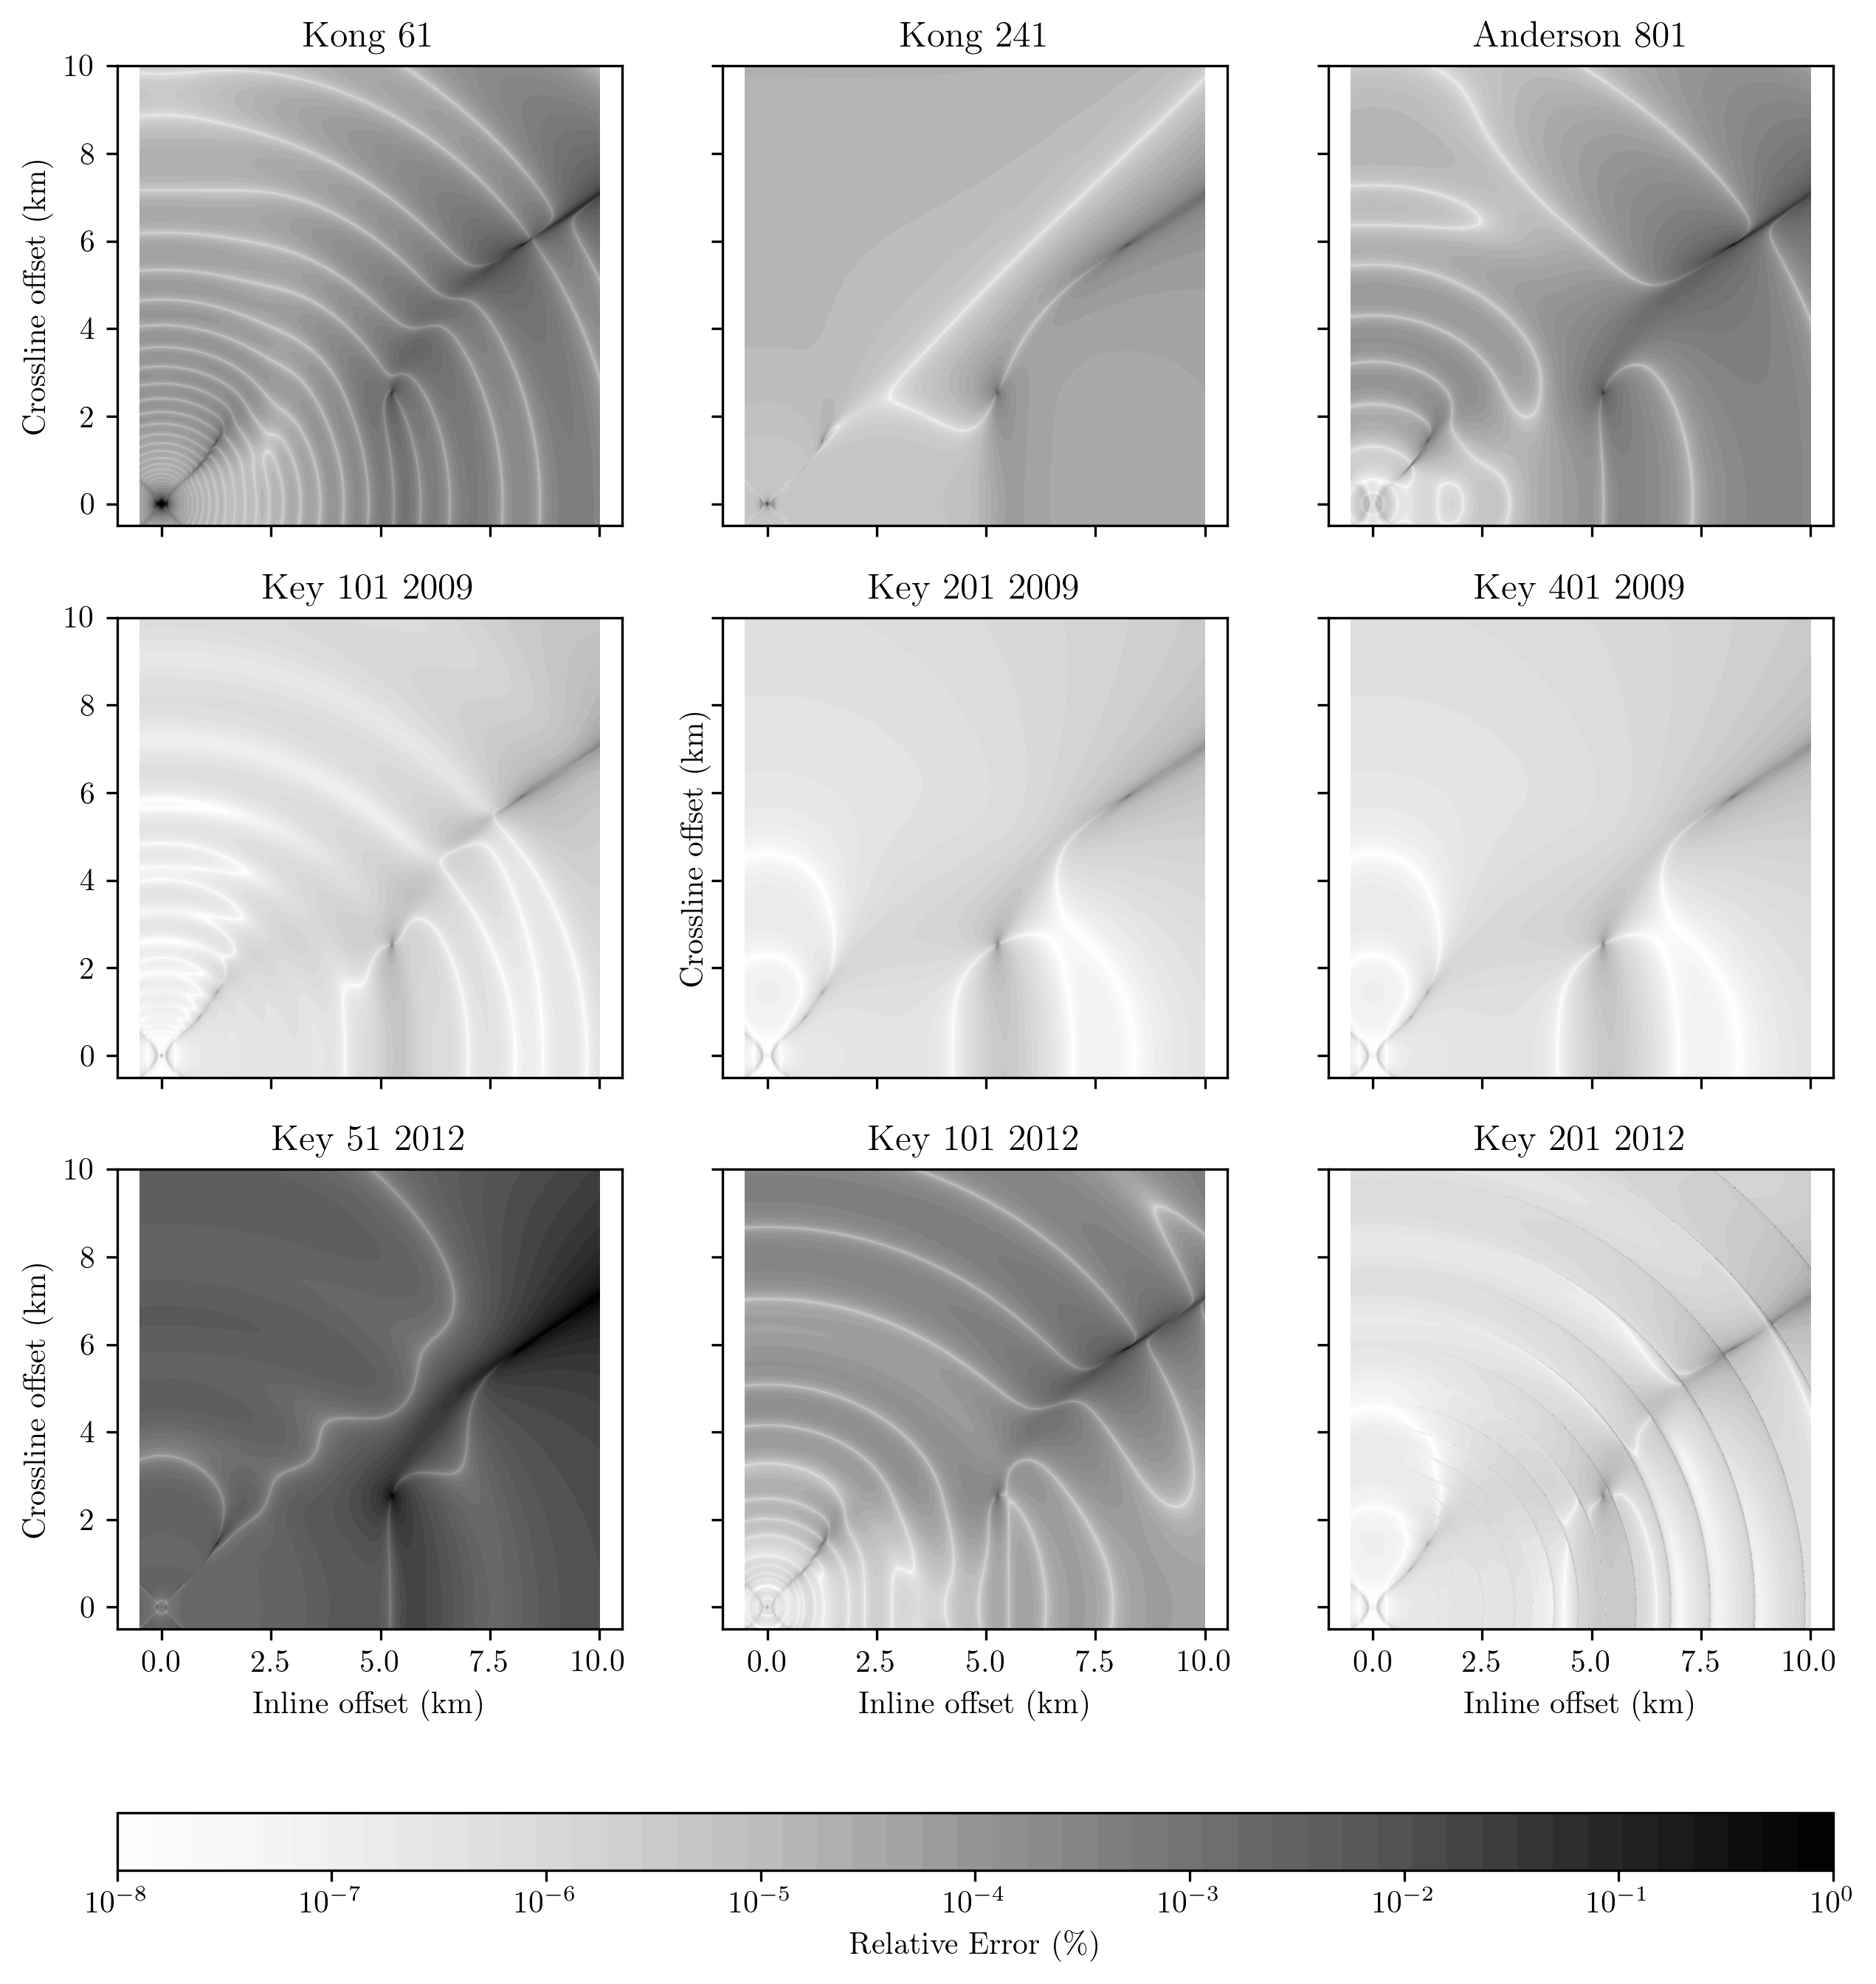

In [10]:
fig, axs = plt.subplots(figsize=(10, 11), facecolor = 'w', nrows=3, ncols=3, sharex=True, sharey=True)
axs = axs.ravel()

# Min and max, properties
vmin = 1e-8
vmax = 1e0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50), 'locator': mpl.ticker.LogLocator(), 'cmap': 'Greys'}

limits(0)
plt.title(r'Kong 61')
cf1 = plt.contourf(rx/1000, ry/1000, fht1amp.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')

limits(1)
plt.title(r'Kong 241')
cf2 = plt.contourf(rx/1000, ry/1000, fht2amp.clip(vmin, vmax), **props)

limits(3)
plt.title(r'Key 101 2009')
cf3 = plt.contourf(rx/1000, ry/1000, fht3amp.clip(vmin, vmax), **props)

limits(4)
plt.title(r'Key 201 2009')
cf4 = plt.contourf(rx/1000, ry/1000, fht4amp.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')

limits(5)
plt.title(r'Key 401 2009')
cf5 = plt.contourf(rx/1000, ry/1000, fht5amp.clip(vmin, vmax), **props)

limits(2)
plt.title(r'Anderson 801')
cf6 = plt.contourf(rx/1000, ry/1000, fht6amp.clip(vmin, vmax), **props)

limits(6)
plt.title(r'Key 51 2012')
cf7 = plt.contourf(rx/1000, ry/1000, fht7amp.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')
plt.ylabel('Crossline offset (km)')

limits(7)
plt.title(r'Key 101 2012')
cf8 = plt.contourf(rx/1000, ry/1000, fht8amp.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')

limits(8)
plt.title(r'Key 201 2012')
cf9 = plt.contourf(rx/1000, ry/1000, fht9amp.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')

# Plot colorbar
cax, kw = mpl.colorbar.make_axes([axs[0], axs[1], axs[2], axs[3], axs[4], axs[5], axs[6], axs[7], axs[8]],
                                 location='bottom', fraction=.05, pad=0.1, aspect=30)
cb = plt.colorbar(cf8, cax=cax, ticks=10**(-(np.arange(11.)[::-1])+2), **kw)
cb.set_label(r'Relative Error $(\%)$')

# Save and show
#plt.savefig('../figures/onederror-amplitude.jpg', bbox_inches='tight')
plt.show()

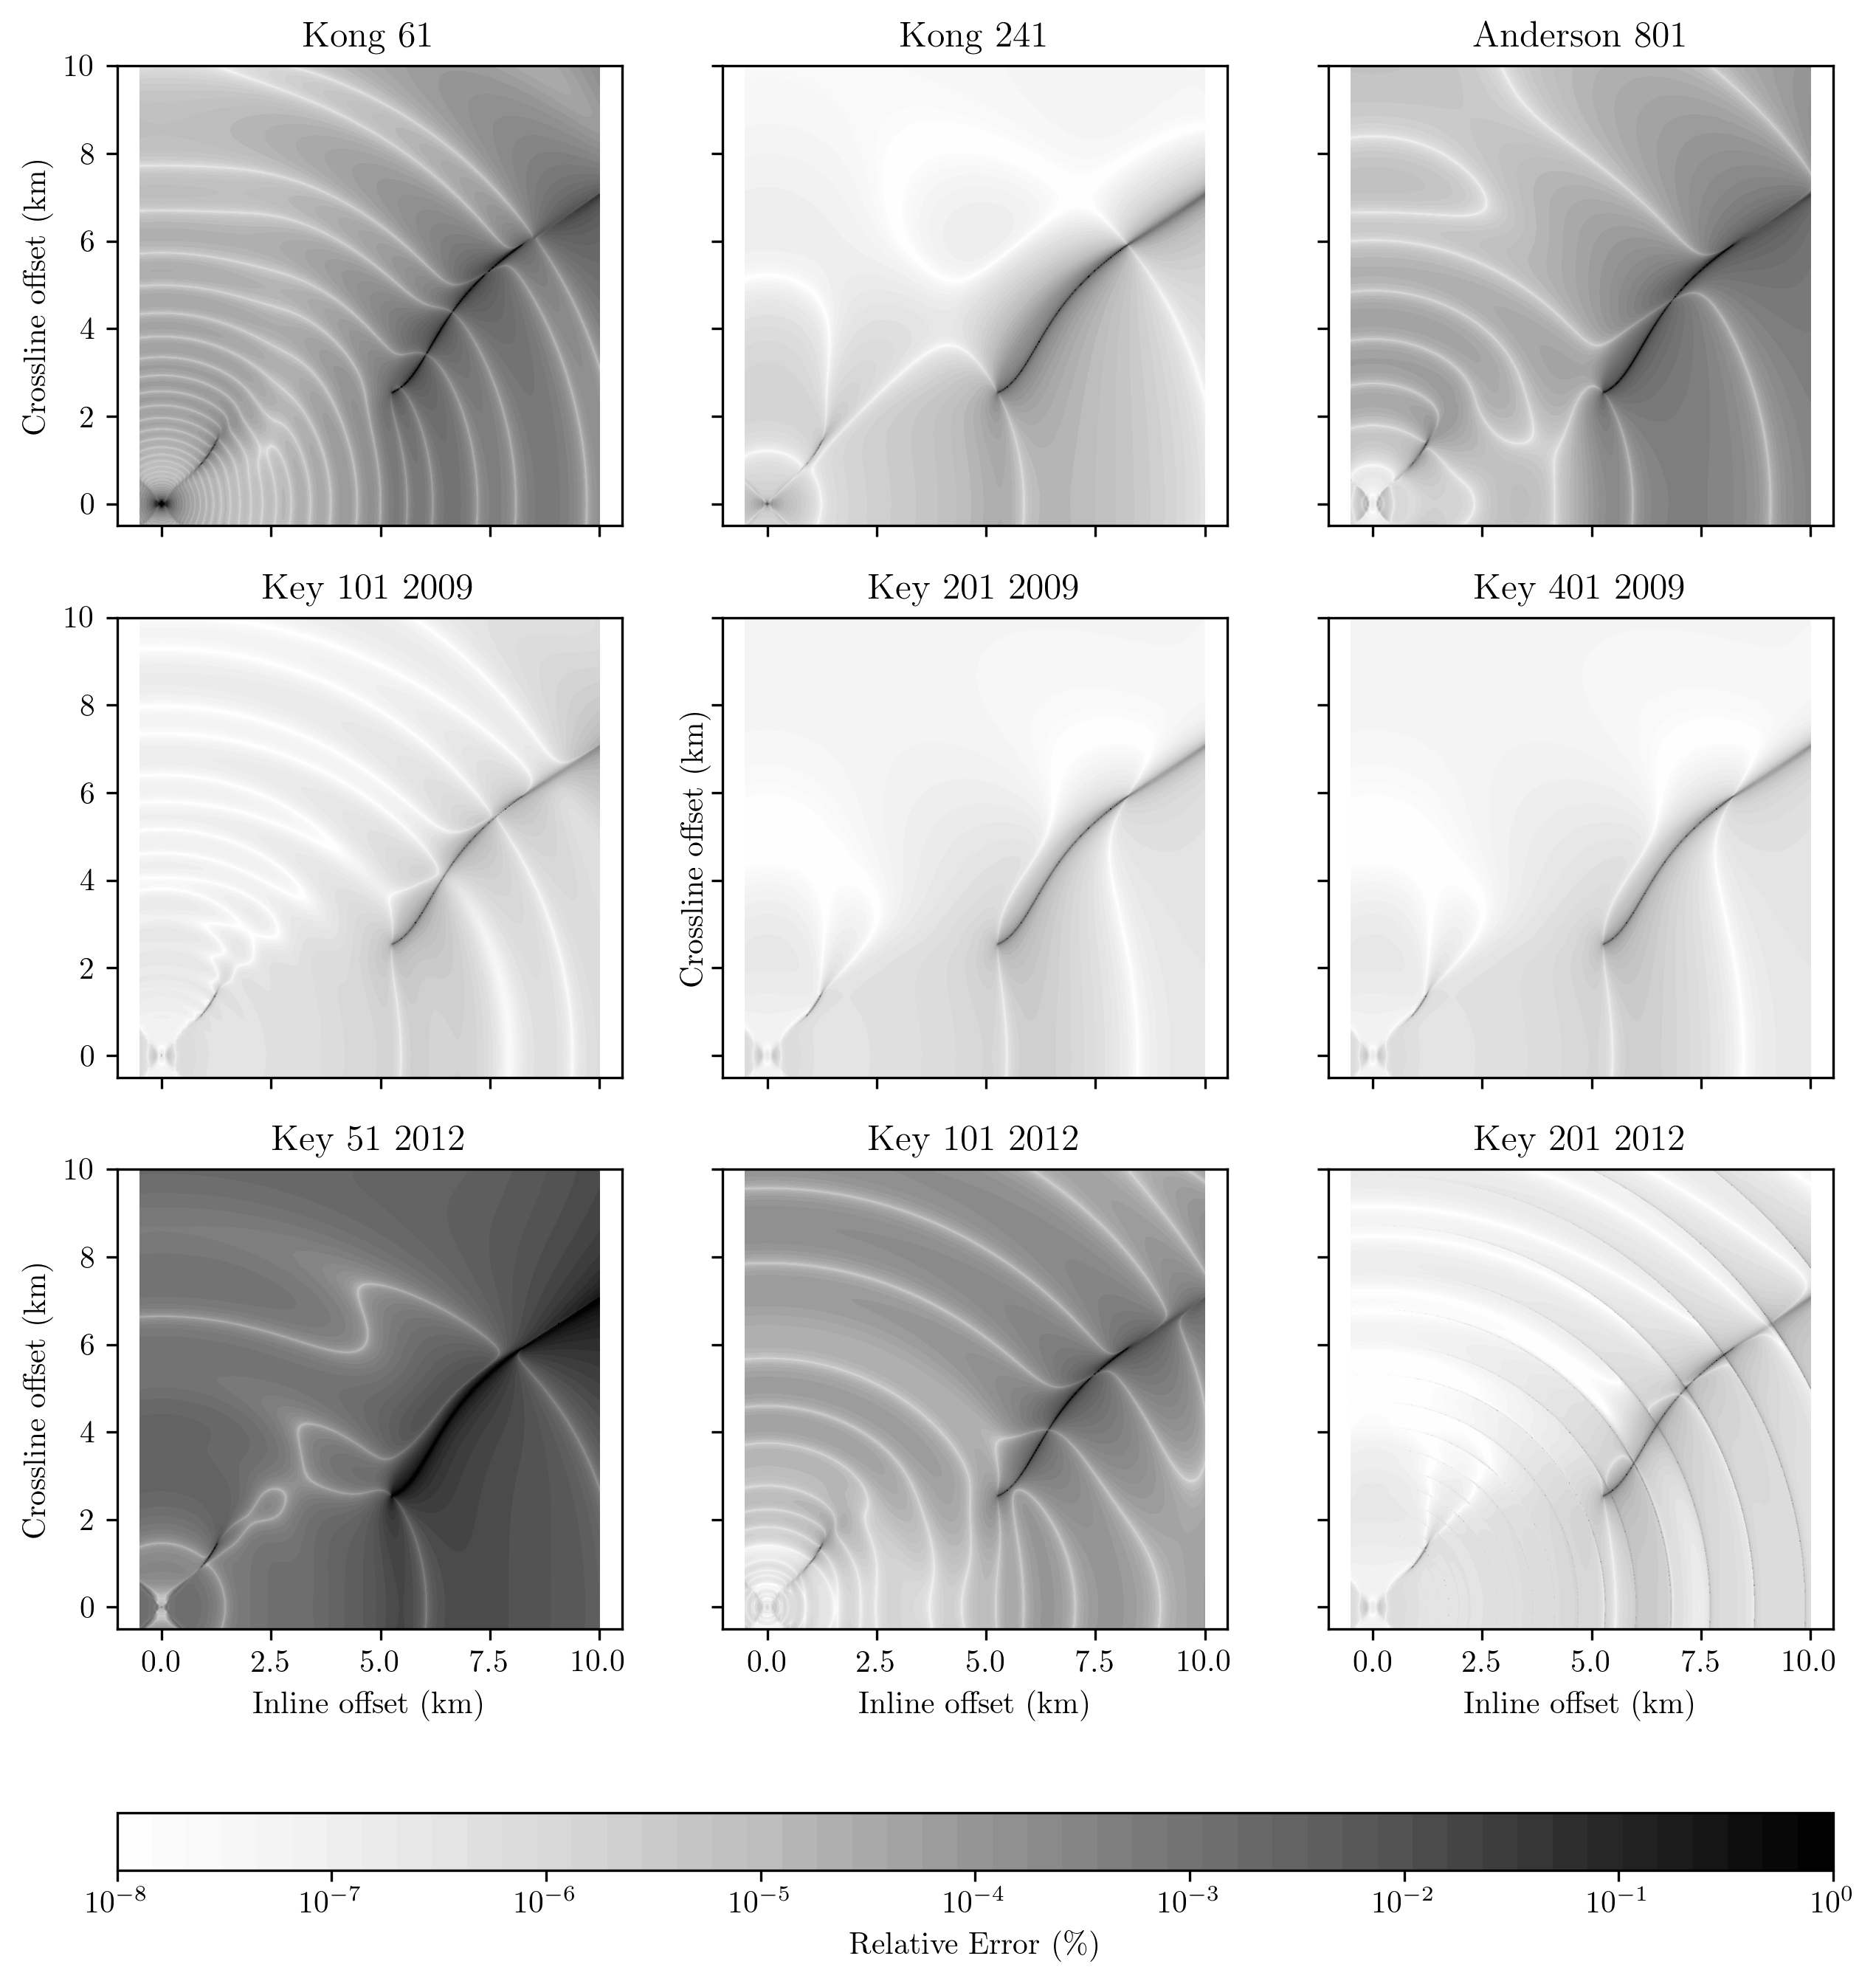

In [11]:
fig, axs = plt.subplots(figsize=(10, 11), facecolor = 'w', nrows=3, ncols=3, sharex=True, sharey=True)
axs = axs.ravel()

# Min and max, properties
vmin = 1e-8
vmax = 1e0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50), 'locator': mpl.ticker.LogLocator(), 'cmap': 'Greys'}

limits(0)
plt.title(r'Kong 61')
cf1 = plt.contourf(rx/1000, ry/1000, fht1pha.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')

limits(1)
plt.title(r'Kong 241')
cf2 = plt.contourf(rx/1000, ry/1000, fht2pha.clip(vmin, vmax), **props)

limits(3)
plt.title(r'Key 101 2009')
cf3 = plt.contourf(rx/1000, ry/1000, fht3pha.clip(vmin, vmax), **props)

limits(4)
plt.title(r'Key 201 2009')
cf4 = plt.contourf(rx/1000, ry/1000, fht4pha.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')

limits(5)
plt.title(r'Key 401 2009')
cf5 = plt.contourf(rx/1000, ry/1000, fht5pha.clip(vmin, vmax), **props)

limits(2)
plt.title(r'Anderson 801')
cf6 = plt.contourf(rx/1000, ry/1000, fht6pha.clip(vmin, vmax), **props)

limits(6)
plt.title(r'Key 51 2012')
cf7 = plt.contourf(rx/1000, ry/1000, fht7pha.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')
plt.ylabel('Crossline offset (km)')

limits(7)
plt.title(r'Key 101 2012')
cf8 = plt.contourf(rx/1000, ry/1000, fht8pha.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')

limits(8)
plt.title(r'Key 201 2012')
cf9 = plt.contourf(rx/1000, ry/1000, fht9pha.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')

# Plot colorbar
cax, kw = mpl.colorbar.make_axes([axs[0], axs[1], axs[2], axs[3], axs[4], axs[5], axs[6], axs[7], axs[8]],
                                 location='bottom', fraction=.05, pad=0.1, aspect=30)
cb = plt.colorbar(cf8, cax=cax, ticks=10**(-(np.arange(11.)[::-1])+2), **kw)
cb.set_label(r'Relative Error $(\%)$')

# Save and show
#plt.savefig('../figures/onederror-phase.jpg', bbox_inches='tight')
plt.show()